In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sb
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
# Load the CSV file
dataset_df = pd.read_csv('dataset/dataset.csv')
dataset_df.head()

,file_id,file_hash,process_id,malicious,api,tid,index
0,2177,3d678bb01678e11b8e01388356891a3f6016824cabc67a...,0,1,RtlSetCurrentTransaction,1780,0
1,2177,3d678bb01678e11b8e01388356891a3f6016824cabc67a...,0,1,NtOpenKeyEx,1780,1
2,2177,3d678bb01678e11b8e01388356891a3f6016824cabc67a...,0,1,RtlSetCurrentTransaction,1780,2
3,2177,3d678bb01678e11b8e01388356891a3f6016824cabc67a...,0,1,NtOpenKeyEx,1780,3
4,2177,3d678bb01678e11b8e01388356891a3f6016824cabc67a...,0,1,RtlSetCurrentTransaction,1780,4


In [3]:
# Copy df
df = dataset_df.copy()
print(df.shape)
print(df.drop_duplicates(subset='file_hash').groupby('malicious')['file_hash'].count())

# Get maximum of 100 file hashes from both malicious == 1/0
# Both quantities should be relatively close to each other
malicious_0 = df[df['malicious'] == 0].drop_duplicates(subset='file_hash').head(200)
malicious_1 = df[df['malicious'] == 1].drop_duplicates(subset='file_hash').head(400)

# Concat the two and extract to dataframe
result = pd.concat([malicious_1, malicious_0])["file_hash"].to_list()
df = df[df["file_hash"].isin(result)]
print(df.shape)
print(df.head())

(5439983, 7)
malicious
0     472
1    3610
Name: file_hash, dtype: int64
(847681, 7)
   file_id                                          file_hash  process_id  \
0     2177  3d678bb01678e11b8e01388356891a3f6016824cabc67a...           0   
1     2177  3d678bb01678e11b8e01388356891a3f6016824cabc67a...           0   
2     2177  3d678bb01678e11b8e01388356891a3f6016824cabc67a...           0   
3     2177  3d678bb01678e11b8e01388356891a3f6016824cabc67a...           0   
4     2177  3d678bb01678e11b8e01388356891a3f6016824cabc67a...           0   

   malicious                       api   tid  index  
0          1  RtlSetCurrentTransaction  1780      0  
1          1               NtOpenKeyEx  1780      1  
2          1  RtlSetCurrentTransaction  1780      2  
3          1               NtOpenKeyEx  1780      3  
4          1  RtlSetCurrentTransaction  1780      4  


/tmp/ipykernel_227268/2601675900.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


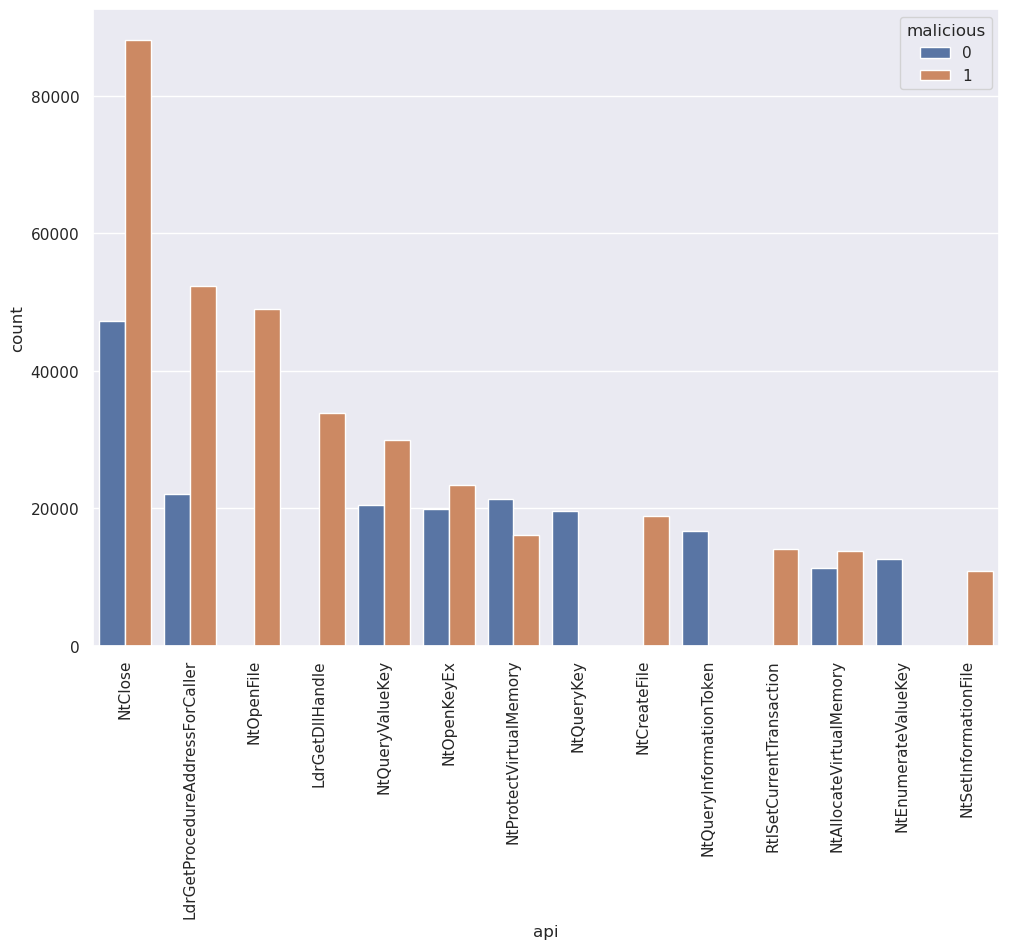

In [4]:
apis = df.drop(columns=['process_id','tid','index'])

unique_api = apis[['api', 'malicious']].value_counts().reset_index().rename(columns={"index": "api", 0: "count"})
unique_hash = apis['file_hash'].unique()

unique_api = unique_api[unique_api['count'] > 10000].set_index(["api", "malicious"])
unique_api.head()

sb.set_theme(rc={'figure.figsize':(11.7,8.27)})
g = sb.barplot(data=unique_api, x="api", y="count", hue="malicious")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()
fig.savefig("eda.png") 